# Predicting the average session duration of a player via experience level

## Introduction

In the gaming industry, it is crucial to understand player behaviour in order to enhance user experience. In particular, a research group in Computer Science at UBC is collecting data about video game playing. To do so, they are using a Minecraft server - a popular open-world sandbox game that allows players to build, explore, and survive in a block-based virtual world. The broad question of interest is which "kinds" of players, measured by their experience level, are most likely to contribute to a large amount of data, measured by their session duration. This is to ensure that the number of licenses on hand is sufficiently large enough to accommodate all players at the same time with a high probability. 

Specifically, we will address the question: **Can we predict the average session duration of a player through their experience level?**

The data we are working with consists of two different sets: **players.csv** which includes data and characteristics about each player, and **sessions.csv** which includes data about each recorded individual playing session.  

<br>

<font size="3"> Players Dataset: A list of all unique players, including data about each player </font>
- Number of observations: 196
- Number of variables: 7

| Variable Name   | Variable Type   | Data Type   | Data Description   |
|------------|------------|------------|------------|
| `experience`  | Categorical  | Character  | Player's experience level in Minecraft (Beginner, Amateur, Regular, Veteran, Pro)  |
| `subscribe`  | Categorical  | Logical  | Whether the individual player has subscribed to the gaming-related newsletter or not (TRUE = Yes, FALSE = No)  |
| `hashedEmail`  | Categorical (unique identifier variable)  | Character  | Hashed version of the player's email for anonymization  |
| `played_hours`  | Quantitative  | Double  | Total number of hours played by the player  |
| `name`  | Categorical  | Character  | Player's name (first name only) |
| `gender`  | Categorical  | Character  | Player's gender (Male, Female, Non-binary, Two-spirited, Other, Prefer not to say) |
| `Age`  | Quantitative  | Double  | Player's age  |  

<br>

<font size="3"> Sessions Dataset: A list of individual play sessions by each player, including data about the session </font>

- Number of observations: 1535
- Number of variables: 5 

| Variable Name   | Variable Type   | Data Type   | Data Description   |
|------------|------------|------------|------------|
| `hashedEmail`  | Categorical (unique identifier variable) | Character  | Hashed version of the player's email for anonymization   |
| `start_time`  | Quantitative  | Character  | Human-readable start time of a playing session, formatted as day/month/year with a 24 hour clock time stamp  |
| `end_time`  | Quantitative  | Character  | Human-readable end time of a playing session, formatted as day/month/year with a 24 hour clock time stamp  |
| `original_start_time`  | Quantitative  | Double  | Start time of a playing session represented in scientific notation Unix timestamp |
| `original_end_time`  | Quantitative  | Double  | End time of a playing session represented in scientific notation Unix timestamp |  

<br>

We will use `experience` as the explanatory variable and average `session duration` as the response variable. By examining patterns in the data, we can determine whether there is a significant relationship between experience and the average session duration of a player.

## Methods & Results

#### Preliminary exploratory data analysis:
Step 1) Imported libraries and read in the `players.csv` and `sessions.csv` datasets from the Minecraft server study.

Step 2) Cleaned and tidied both datasets by selecting relevant columns and converting timestamps to usable formats.

Step 2a) For `sessions.csv`, we separated the `start_time` and `end_time` columns into individual date and time components, <br>
parsed them into POSIX datetime format, and calculated session duration in minutes by subtracting the start from the end timestamp.

Step 3) Merged the datasets using `hashedEmail` to link player profiles with their individual play sessions.

Step 4) Split the data into training and testing sets (only working with the training set until the final evaluation).

Step 5) Summarized the training set to calculate average session duration for each player.

Step 6) Visualized the relationship between session duration and experience level to explore potential patterns.

#### Performing a Linear Regression Analysis:
The objective of this project was to determine whether a player’s self-reported experience level could predict their average session duration. To evaluate this relationship, we built a linear regression model using only the training data, then generated predictions on unseen test data and assessed the model’s performance visually.

---

Step 1) Created a linear regression model to predict average session duration using experience level as the explanatory variable.

Step 2) Fitted the model using the training data only.

Step 3) Evaluated the model using predictions on the test set (unseen data).

Step 4) Visualized predicted versus actual session durations to assess the model’s effectiveness.

Step 5) Interpreted results and assessed whether experience level is a meaningful predictor of play behavior.

---

We believe utilizing a linear regression model is appropriate as it provides a clear and interpretable way to understand the relationships between player characteristics (such as experience and hours played) and the total data contribution as a continuous outcome. Moreover, linear regression assumes that there is a linear relationship between the predictors and the dependent variable, which makes it useful for quantifying how each player characteristic contributes to the total data contribution. Furthermore, linear regression works well on small datasets whereas k-nn regression can be more sensitive to small sample sizes and noise (especially when the predictor is not numeric).

### Preliminary exploratory data analysis:

#### Importing Libraries

In [2]:
library(tidyverse)
library(tidymodels)
library(repr)
library(lubridate)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

#### Importing Players and Sessions Datasets
We utilized read_csv to import both of the datasets from the online directory.

In [3]:
players = read_csv("https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz")
sessions = read_csv("https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB")

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### Cleaning & Wrangling the Data
We clean and prepare both datasets. For the players dataset, we remove irrelevant variables. For sessions, we separate date and time, convert to POSIX datetime, and compute session duration in minutes.

In [4]:
set.seed(1)

# Remove subscription and gender variables from player dataset
players_clean <- select(players, experience, hashedEmail, played_hours, name, age)
head(players_clean)

# Separate start_time and end_time into individual date & time columns for session dataset, and then compute session duration
sessions_clean <- sessions |>
  separate(start_time, into = c("start_date", "start_time"), sep = " ") |>
  separate(end_time, into = c("end_date", "end_time"), sep = " ") |>
  mutate(start_datetime = parse_date_time(paste(start_date, start_time), orders = "dmy HM"),
         end_datetime = parse_date_time(paste(end_date, end_time), orders = "dmy HM"),
         duration_mins = as.numeric(difftime(end_datetime, start_datetime, units = "mins"))) |>
  filter(!is.na(duration_mins)) |>
  select(hashedEmail, duration_mins)

experience,hashedEmail,played_hours,name,age
<chr>,<chr>,<dbl>,<chr>,<dbl>
Pro,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,9
Veteran,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,17
Veteran,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,17
Amateur,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,21
Regular,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,21
Amateur,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,17


Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `end_datetime = parse_date_time(paste(end_date, end_time),
  orders = "dmy HM")`.
Caused by warning:
!  2 failed to parse.”


$Figure$ $1$

**Legend**: This table shows the first six rows of the cleaned `players_clean` dataset after removing irrelevant columns and tidying the data. Each row corresponds to an individual player, showing their experience level, anonymized identifier (hashedEmail), total hours played, name, and age.


**Interpretation**: During the date-time conversion step, a warning appeared indicating that two values failed to parse correctly using `parse_date_time()`. This typically occurs when timestamps are missing or improperly formatted (e.g., invalid dates or times). These rows were automatically filtered out using `filter(!is.na(duration_mins))` to ensure only valid session durations were included in the analysis. Since only two rows were affected, this had a negligible impact on the overall results.

#### Merging the Cleaned Datasets
We merge the cleaned players and sessions datasets using the common key `hashedEmail` in order to split into training and testing sets. This allows us to analyze player characteristics in relation to their session behavior.

In [5]:
set.seed(1)

# Combining both datasets in order to split into training and testing sets 
combined_data <- players_clean |>
  inner_join(sessions_clean, by = "hashedEmail")

#### Splitting the Data into Training and Testing Sets
Before working on our model, we need to split the data into training and testing sets. We split the combined dataset into training (75%) and testing (25%) sets, stratifying by experience level. We do not use the test set until the very end to avoid data leakage.

In [6]:
set.seed(123)

# Splitting dataframe into training and testing datasets
split <- initial_split(combined_data, prop = 0.75, strata = experience)

train_df <- training(split)
test_df <- testing(split)

head(train_df)
head(test_df)

experience,hashedEmail,played_hours,name,age,duration_mins
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
Pro,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,9,7
Pro,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,9,56
Pro,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,9,75
Pro,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,9,45
Pro,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,9,109
Pro,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,9,15


experience,hashedEmail,played_hours,name,age,duration_mins
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
Pro,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,9,74
Pro,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,9,44
Pro,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,9,12
Pro,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,9,119
Pro,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,9,211
Pro,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,9,40


$Figure$ $2$

**Legend**: This table shows the first six rows of the training dataset, created by stratified splitting of the full dataset (75% for training, 25% for testing). Each row represents an individual play session and includes the player’s experience level, hashed identifier, playtime in hours, name, age, and session duration in minutes.


**Interpretation**: This confirms that the training set has preserved the key structure and variables from the original data. Multiple sessions for the same player (e.g., Morgan) appear as separate rows, each with a unique session duration. This dataset will be used for all model development and exploratory analysis to avoid data leakage.

---

$Figure$ $3$

**Legend**: This table shows the first six rows of the testing dataset, which will be used solely for final model evaluation. It includes the same structure as the training set and was created using stratified sampling to ensure proportional representation of experience levels.


**Interpretation**: The test set also contains multiple sessions for the same player, showing how session duration can vary widely. This range underscores the variability we hope to capture in our modeling. No summaries or models are built on this data until the very end of the analysis.

#### Summarizing the Training Data
We calculate the average session duration for each player using only the training data. This will serve as the basis for both exploratory analysis and model fitting.

In [7]:
# Summarize average session duration per player in training set
train_summary <- train_df |>
  group_by(hashedEmail, experience, age, name) |>
  summarize(avg_duration = mean(duration_mins), .groups = "drop")

# Prepare test set summary (for evaluation later)
test_summary <- test_df |>
  group_by(hashedEmail, experience, age, name) |>
  summarize(avg_duration = mean(duration_mins), .groups = "drop")

head(train_summary)
head(test_summary)

hashedEmail,experience,age,name,avg_duration
<chr>,<chr>,<dbl>,<chr>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,Regular,20,Isaac,53.00000
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,Pro,21,Lyra,30.00000
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,17,Winslow,32.83333
0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,Pro,17,Knox,35.00000
11006065e9412650e99eea4a4aaaf0399bc338006f85e80cc82d18b49f0e2aa4,Veteran,19,Callum,10.00000
18936844e06b6c7871dce06384e2d142dd86756941641ef39cf40a9967ea14e3,Amateur,14,Kyrie,31.39286


hashedEmail,experience,age,name,avg_duration
<chr>,<chr>,<dbl>,<chr>,<dbl>
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,Beginner,17,Osiris,11
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,17,Winslow,24
119f01b9877fc5ea0073d05602a353b91c4b48e4cf02f42bb8d661b46a34b760,Amateur,21,Hugo,50
18936844e06b6c7871dce06384e2d142dd86756941641ef39cf40a9967ea14e3,Amateur,14,Kyrie,26
1a2b92f18f36b0b59b41d648d10a9b8b20a2adff550ddbcb8cec2f47d4d881d0,Beginner,37,Aurora,18
200db0417ee70863c7e2a0f214c737476fb86de5869d0b907a077d726357e687,Amateur,17,Anastasia,12


$Figure$ $4$

**Legend**: This table displays the first six rows of the summarized training set, where each row now represents a single player. The average session duration was computed by grouping all session durations for each player in the training set.




**Interpretation**: We can see variability in average session duration even among players with the same experience level (for example, both Pro and Regular players appear with different average values). This summary is now in the correct format for regression modeling, where each observation corresponds to one player with a single outcome (`avg_duration`) and predictor (`experience`).



---

$Figure$ $5$

**Legend**: This table presents the first six rows of the summarized test set. Like the training summary, each player appears only once, with an average session duration based on all of their test sessions.


**Interpretation**: The test set summary mirrors the structure of the training summary and will be used solely for evaluating the model’s predictions. The spread of average durations (especially within the same experience group) highlights the challenge of building a predictive model based on experience alone.

#### Visualizing Average Session Duration by Player Experience
We create a bar chart showing the average session duration for each experience level using the training set only.

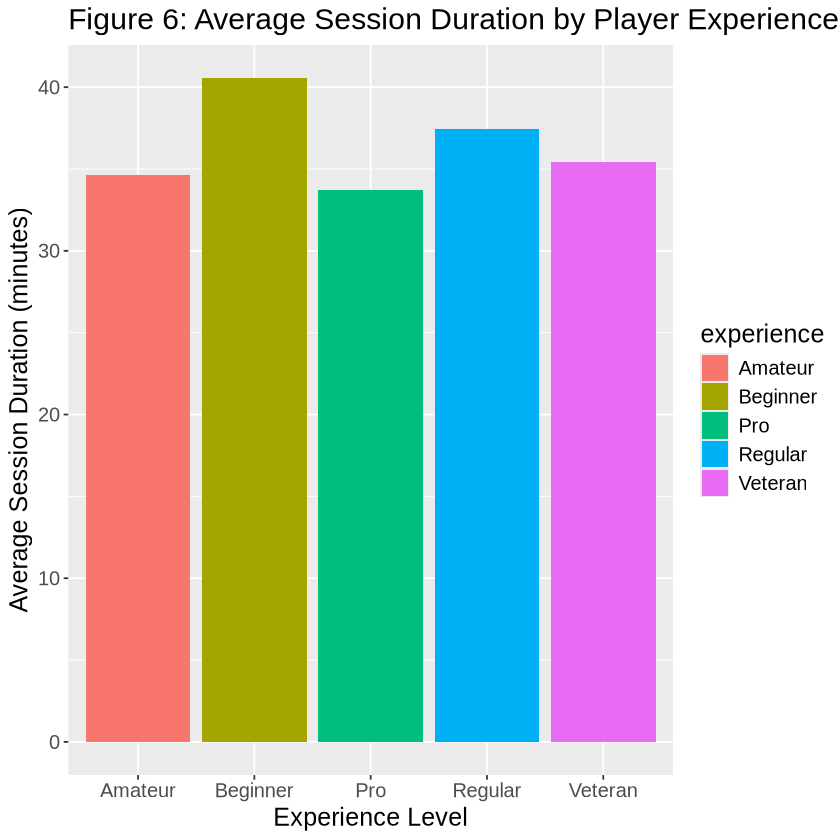

In [8]:
# Summarize average session duration by experience
eda_summary_train <- train_summary |>
  group_by(experience) |>
  summarize(mean_duration = mean(avg_duration), count = n())

# Plot
ggplot(eda_summary_train, aes(x = experience, y = mean_duration, fill = experience)) +
  geom_bar(stat = "identity") +
  labs(
    title = "Figure 6: Average Session Duration by Player Experience (Training Set)",
        x = "Experience Level",
        y = "Average Session Duration (minutes)")+
    theme(text = element_text(size = 15))

$Figure$ $6$

**Legend**: This bar chart displays the mean average session duration for players in each experience group, calculated using only the training data. Each bar represents the average of all players within a given experience level, where individual values were computed as the mean duration across all sessions for each player.

**Interpretation**: The differences between experience groups are relatively modest. Players in the "Beginner" and "Regular" categories show slightly higher average session durations, while "Pro" and "Amateur" players have lower averages. However, the differences are not substantial enough to suggest a strong or consistent trend. These findings indicate that while experience level may be loosely associated with session duration, it is unlikely to serve as a robust or reliable predictor. This is consistent with the later regression results, which found no statistically significant effect.

### Regression Analysis (Linear Regression)
We fit a linear regression model using the training data to predict average session duration from experience level.

In [9]:
# Fit linear regression model
lm_model <- linear_reg() |>
  set_engine("lm") |>
  fit(avg_duration ~ experience, data = train_summary)

summary(lm_model$fit)


Call:
stats::lm(formula = avg_duration ~ experience, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-35.55 -25.42 -14.45  15.49 111.58 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         34.6158     6.1277   5.649 1.75e-07 ***
experienceBeginner   5.9372    10.5089   0.565    0.573    
experiencePro       -0.8991    13.2373  -0.068    0.946    
experienceRegular    2.8562     9.9752   0.286    0.775    
experienceVeteran    0.8065    10.1373   0.080    0.937    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 35.2 on 93 degrees of freedom
Multiple R-squared:  0.004348,	Adjusted R-squared:  -0.03848 
F-statistic: 0.1015 on 4 and 93 DF,  p-value: 0.9817


$Figure$ $7$

**Legend**: This output shows the results of a linear regression model trained to predict a player’s average session duration based on their self-reported experience level. The model was fit using the training set only. The intercept represents the average duration for the baseline category ("Amateur"), and the other coefficients reflect differences relative to that group.

**Interpretation**: The model’s R² value is extremely low (0.004348), indicating that experience level explains less than 1% of the variability in session duration. Additionally, none of the experience-level coefficients are statistically significant (all p-values > 0.5), suggesting that differences between groups are not reliable or generalizable. This confirms that experience alone is not a strong or meaningful predictor of how long players engage in sessions. The model may be underfitting the data, or the predictor simply lacks explanatory power for this outcome.

#### Visualizing Predicted vs Actual Values on the Test Set
We use the test set to evaluate the model by visually comparing predicted values to actual session durations.

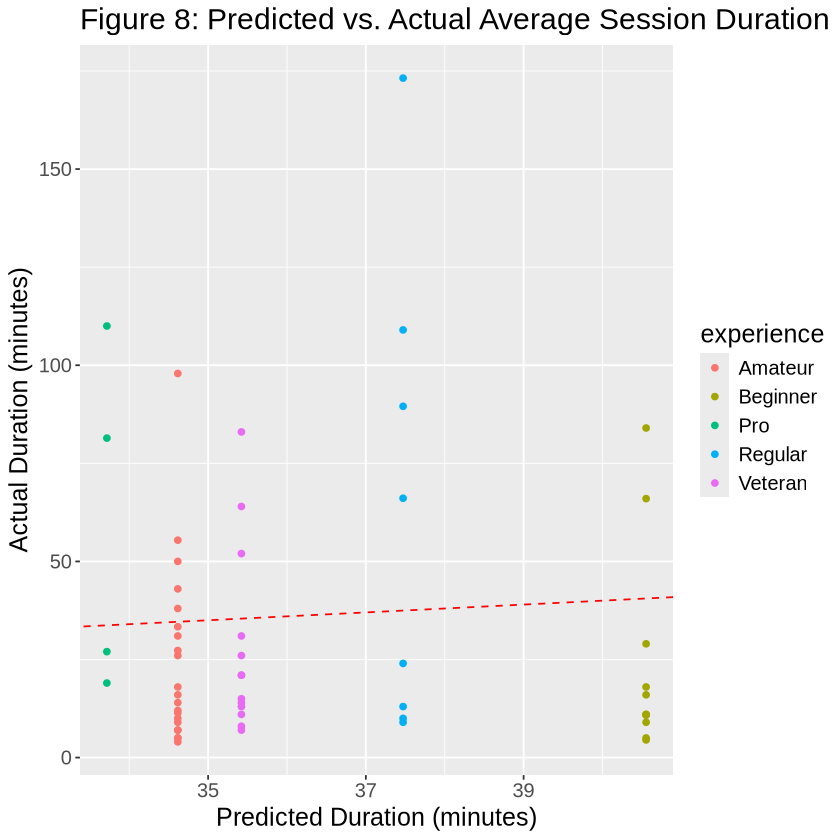

In [10]:
# Predict on test set (unseen data)
test_summary <- test_summary |>
  mutate(pred = predict(lm_model, test_summary)$.pred)

# Plot
ggplot(test_summary, aes(x = pred, y = avg_duration, color = experience)) +
  geom_point() +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  labs(
    title = "Figure 8: Predicted vs. Actual Average Session Duration",
        x = "Predicted Duration (minutes)",
        y = "Actual Duration (minutes)") +
    theme(text = element_text(size = 15))

$Figure$ $8$

**Legend**: This scatterplot shows the predicted average session duration (x-axis) versus the actual observed average session duration (y-axis) for each player in the test set. Each point represents one player, and color indicates the player's experience level. The red dashed line represents perfect prediction (where predicted and actual values are equal).


**Interpretation**: Points are widely scattered around the diagonal reference line, with no clear clustering or trend. This confirms that the linear model fails to accurately predict session duration from experience level. Many points deviate significantly from the red line, especially at higher durations, which shows that the model underestimates variability in the outcome. These results are consistent with the regression output, where R² was extremely low and all predictors were non-significant. Overall, this visualization reinforces the conclusion that experience level alone does not explain session behavior.

## Discussion

### Summarizing what we found

### Expected findings vs outcome

### What impact could such findings have?

### What future questions could this lead to?